# __Generation of genetic DFNs (the UFM model)__


### Problem statement

We define a process to generate DFN that takes into account the physical interaction between fractures, following the UFM (Universal Fracture Model) model. 
<br>
This generation process is more realistic than the ones generated through methods availabe in the module __Generator__.


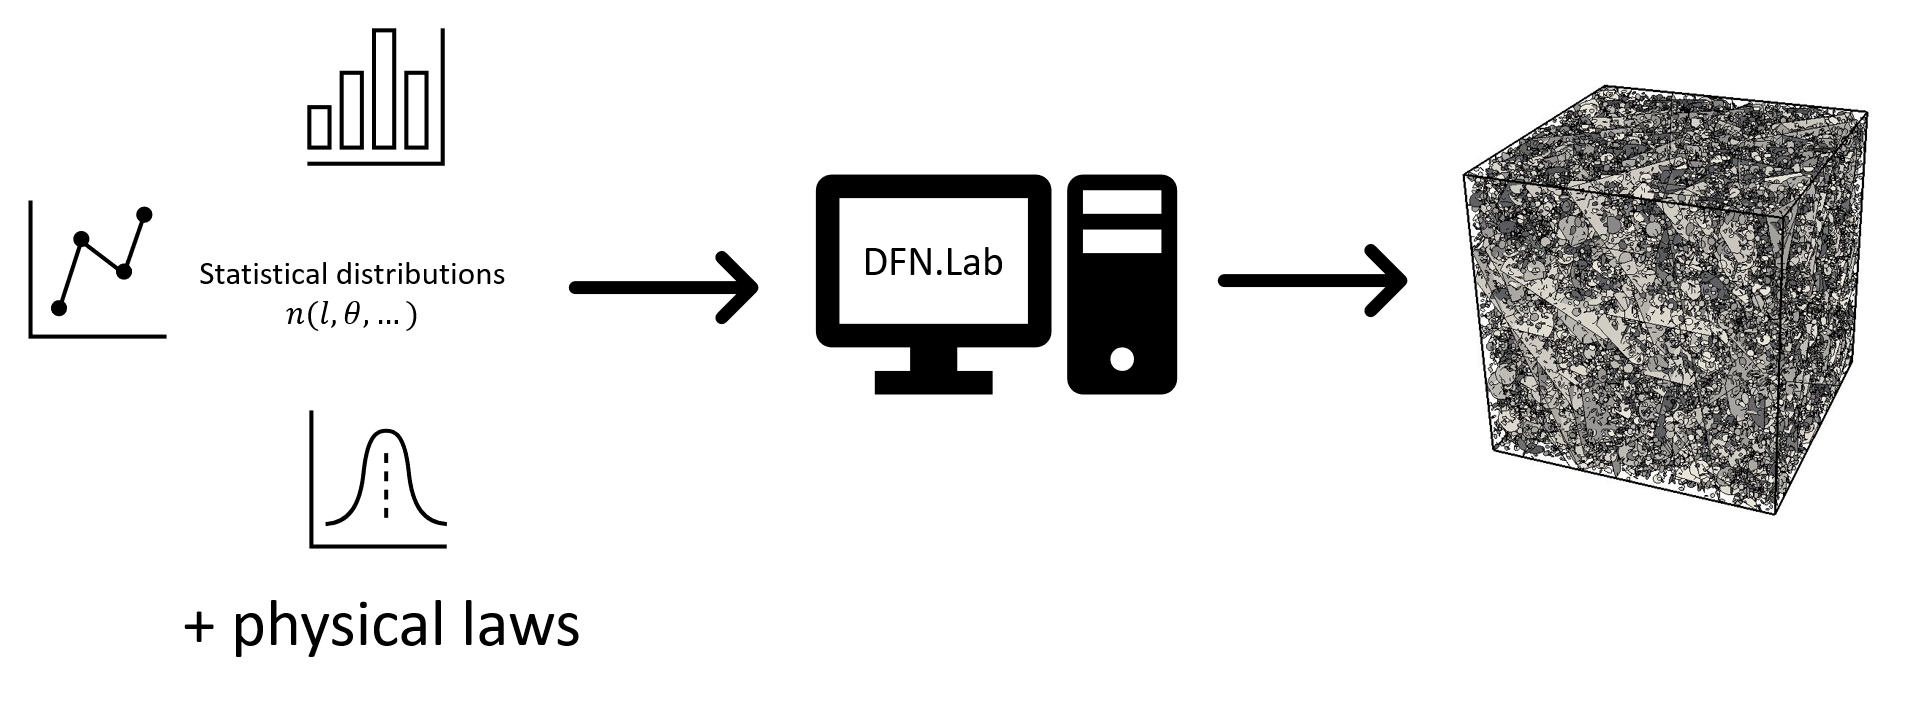
<center>
From genetic rules to DFN realizations
</center>

### Theoretical background
The UFM model is a genetic DFN model, based on three simplified kinematic rules, mimicking the fracture growth process _[[Davy et al. 2010](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2009JB007043), [Davy et al. 2013](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/jgrb.50120)]_:
<br>
- __Nucleation__: the fracture birth process. Nuclei are introduced in the system at constant rate $\dot{n}$ (number of nuclei per unit volume per unit time)
<br>
- __Propagation__: the fracture growth law. Once created, fractures grow following a power-law relationship between the fracture growth speed $v$ and the fracture size $l$, to describe the crack tip velocity in the subcritical regime (Charles' law):
$$v(l)=C \cdot l^a$$
with $C$ the growth rate, and $a$ the growth exponent
<br>
- __Arrest__: the arrest rule is assumed to reflect the mechanical interaction between fractures. In this model, we consider these interactions as a binary law where fractures can only terminate against larger ones, but the reverse is not likely to occur.

With simple kinematic rules that mimic the main mechanical processes, the model produces fracture size distributions and fracture intersections consistent with field observations. The T-intersections resulting from such generation process cannot be produced in purely stochastic models. The UFM processes result in a two power-law fracture size distribution. Small fractures are statistically freely growing, leading to a dilute regime, where the fracture size distribution $n_{dilute}(l)$ follow this equation :
$$n_{dilute}(l)=\frac{\dot{n}}{C} \cdot l^{-a}$$
Larger fractures interact and terminate against one another, leading to a likely universal power-law size distribution $n_{dense}(l)$, corresponding to what we call the dense regime :
$$n_{dense}(l)=\alpha_{D} \cdot l^{-4}$$
with $\alpha_{D}$ a density term that mainly depend on fracture orientations. These two regimes are separated by a transition scale $l_{c}$.

### What will you learn ?
- Generate a simple UFM model using target metrics
- Generate a UFM model using growth parameters

### DFN.Lab model

The implemented UFM model needs the following parameters:

- Statistical nuclei distributions :
  - Positions: uniform, fractal or bootstrapped
  - Orientations: uniform, Fisher or bootstrapped
  - Nuclei size distribution (uniform, power-law, exponential, bootstrapped)
  - Nuclei rate $\dot{n}$


- Growth parameters :
    - Growth exponent $a$
    - Growth rate $C$
    

- Intersections parameters :
    - Nuclei suppression mode: 0=keep all, 1=remove nuclei if intersect larger fracture, 2=remove nuclei if intersect existing fracture
    - T_mode : intersection mode. 0=constant intersection size (applied during the run), 1=proportional to fracture size (applied during the run), 2=constant intersection size (applied after the run), 3=proportional to fracture size (applied after the run)
    - T_length: can be either the size of T intersection (T_mode=0 or 2) or the proportionality coefficient (T_mode=1 or 3)
    - T_side: same for fracture intersecting another fracture on its side
   
   
- Model parameters :
    - Output filename and type
    - Number of steps: number of nuclei introduced at each computation step. A large number of nuclei fasten computations (default is 10nuclei).
    - Number of threads. This allows to fasten computations. The default value is -1 (which means all).
    - Dimensionless ending time $t_{end}^{*}$ (dimensionless time $t^{*}=1$ corresponds to the time for the first fracture to become infinite). Default 1.
    
    
You should be familiar with tutorial "Stochastic DFN generation".

The required modules are __Basis__ and __UFMGenerator__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.
<br>
We use [_matplotlib_](https://matplotlib.org) and [_mplstereonet_](https://github.com/joferkington/mplstereonet) to construct plot from networks analysis.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](https://gitlab.com/fractorylab/dfnlab/-/blob/new_tutos/Tutorials/sources/functions.py).

In [1]:
import dfnlab.Basis as basis
import dfnlab.UFMGenerator as ufmgenerator

import pyvista as pv
import os 

_____________

## Example: Simple generation from target parameters

You can easily create simple UFM model with target parameters such as:
- minimum fracture size
- fracture position distribution
- fracture orientation distribution
- transition scale $l_{c}$
- dilute regime exponent $a$

Similarly to stochastic DFN generation, we will create an empty fracture network from a domain.

In [2]:
system = basis.System()
system.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = basis.DFN(system)

We need a _UFMGenerator_ object to create a UFM-DFN.

In [3]:
generator = ufmgenerator.UFMGenerator(fnet, seed=1001)

Then set desired target distributions, before launching the generation process.

In [4]:
generator.setNucleiSizeMin(lmin=3) 
generator.setPositionsUniform()
generator.setOrientationsUniform()
generator.setGrowthParametersFromTransitionScale(lmin=3, transitionScale=10, growthExponent=3.)

generator.generate();

Visualisation

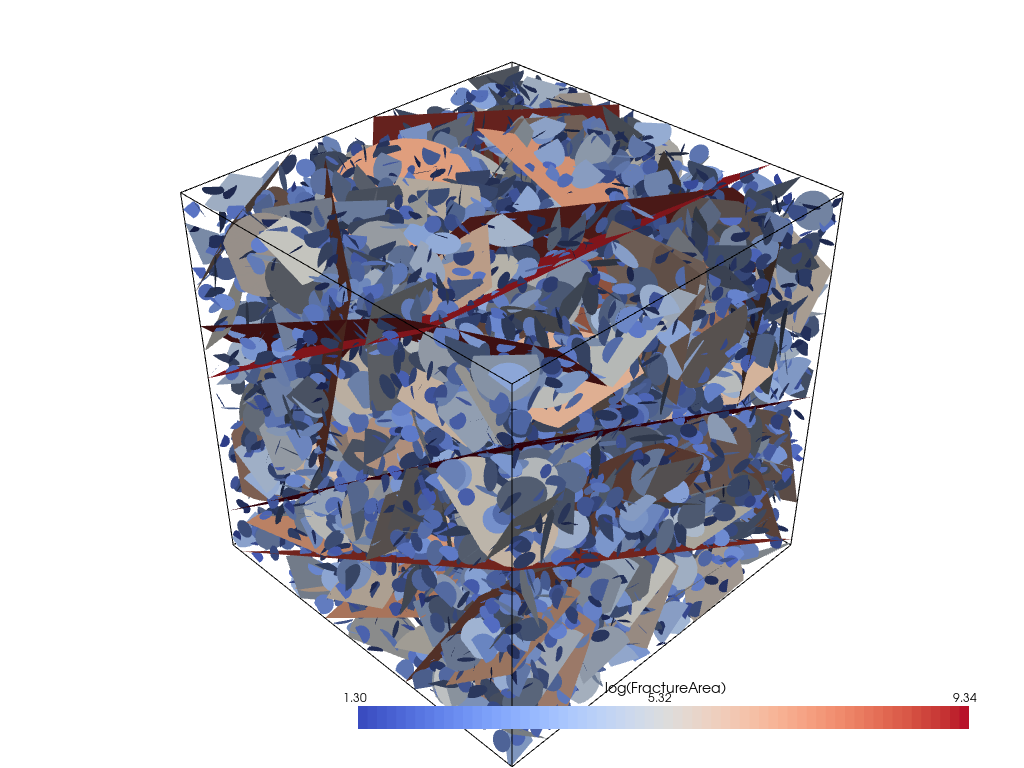

In [5]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tuto6_dfn1","FractureArea",log=True)

_____________